# Problem 3: Degree distribution of a real network

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [12]:
path = r"C:\Users\corin\OneDrive\Physik Master\WiSe 23\Physics of complex systems\Homework\Assignment 10\OClinks_w_chars.txt"

df = pd.read_csv(path, sep=" ")
df.columns = ["number of user 1", "number of user 2", "number of characters in message"]

In [13]:
df.head()

,number of user 1,number of user 2,number of characters in message
0,1,3,1058
1,1,30,341
2,1,32,132
3,1,36,1074
4,1,42,193


In [14]:
df.shape

(20295, 3)

In [15]:
#degree of user 1
num_users = df['number of user 1'].max()

list_degrees = []
list_nodes = []

for n in range(1, num_users+1):
    user_subtable = df[df['number of user 1'] == n]
    user_degree = user_subtable.shape[0]
    if user_degree > 0:
        list_nodes.append(n)
        list_degrees.append(user_degree)
    
degrees = {"node": list_nodes, "degree": list_degrees}
degrees_df = pd.DataFrame(degrees)

In [16]:
degrees_df.head()

,node,degree
0,1,32
1,3,175
2,5,1
3,6,45
4,8,28


Text(0.5, 1.0, 'Histogram of the degrees')

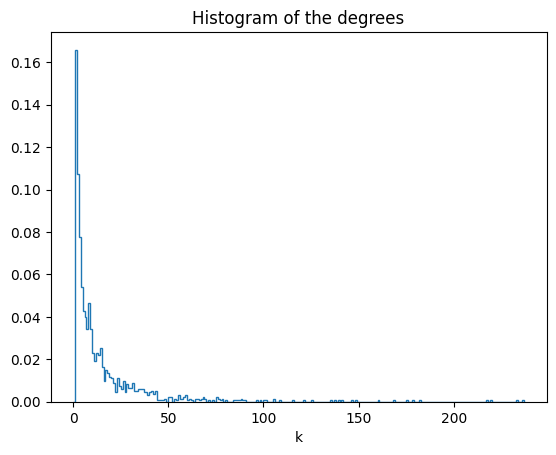

In [17]:
bins = range(np.max(degrees_df["degree"])+1)
counts, bins = np.histogram(degrees_df["degree"], bins=bins, density=True)
plt.stairs(counts, bins)
plt.xlabel("k")
plt.title("Histogram of the degrees")

C:\Users\corin\AppData\Local\Temp\ipykernel_22960\3328635699.py:3: RuntimeWarning: divide by zero encountered in log
  plt.stairs(np.log(counts_log), bins_log)


Text(0.5, 1.0, 'Histogram of the degrees')

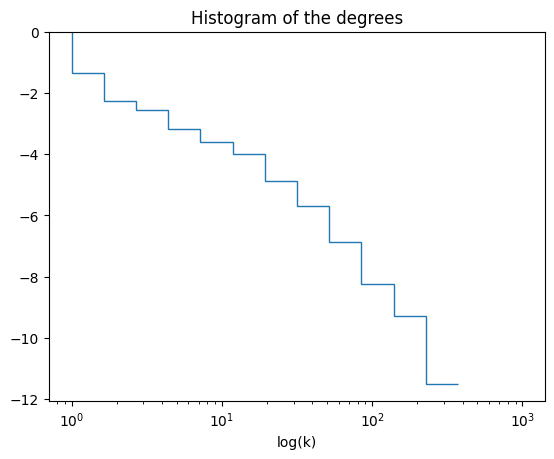

In [18]:
x_log = np.log(np.arange(1,1+num_users))
counts_log, bins_log = np.histogram(degrees_df["degree"], bins=np.logspace(start=0, stop=np.log10(1000), num=15), density=True)
plt.stairs(np.log(counts_log), bins_log)
#plt.hist(degrees_df["degree"], bins=np.logspace(start=0, stop=np.log10(1000), num=15), density=True,log= True)
plt.gca().set_xscale("log")
plt.xlabel("log(k)")
plt.title("Histogram of the degrees")

Text(0.5, 1.0, 'Histogram of the degrees')

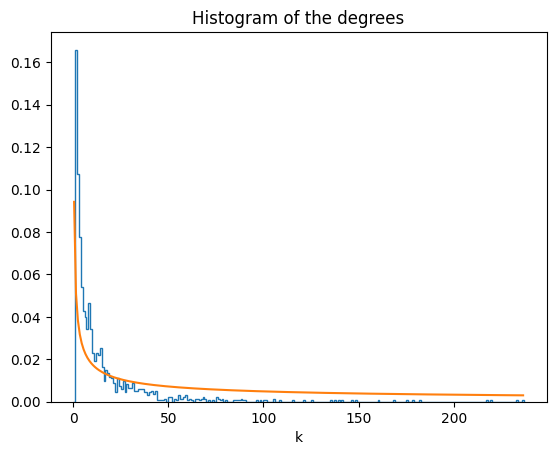

In [35]:
def degree_distribution(k, alpha, pref):
    return pref*k**(-alpha)

bins_centers = [bins[i]+0.5*(bins[i+1]-bins[i]) for i in range(len(bins)-1)]

popt, cov = curve_fit(degree_distribution, bins_centers, counts)

plt.stairs(counts, bins)
plt.plot(bins_centers, degree_distribution(bins_centers, *popt))
plt.xlabel("k")
plt.title("Histogram of the degrees")

In [40]:
print(r"Fit parameters: $\alpha$:", popt[0], "2m^2:", popt[1])

Fit parameters: $\alpha$: 0.5590020087813917 2m^2: 0.06394896786621276
